In [1]:
pip install --upgrade pandas-datareader

     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 32.8 MB/s eta 0:00:00
     --------------------------------------- 10.4/10.4 MB 21.1 MB/s eta 0:00:00
     --------------------------------------- 14.6/14.6 MB 17.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\tnish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.backend import shape

Epoch 1/25
76/76 [==============================] - 7s 42ms/step - loss: 0.0141
Epoch 2/25
76/76 [==============================] - 3s 42ms/step - loss: 0.0082
Epoch 3/25
76/76 [==============================] - 3s 43ms/step - loss: 0.0072
Epoch 4/25
76/76 [==============================] - 3s 41ms/step - loss: 0.0077
Epoch 5/25
76/76 [==============================] - 3s 41ms/step - loss: 0.0075
Epoch 6/25
76/76 [==============================] - 3s 42ms/step - loss: 0.0069
Epoch 7/25
76/76 [==============================] - 3s 43ms/step - loss: 0.0065
Epoch 8/25
76/76 [==============================] - 3s 42ms/step - loss: 0.0063
Epoch 9/25
76/76 [==============================] - 3s 42ms/step - loss: 0.0062
Epoch 10/25
76/76 [==============================] - 3s 41ms/step - loss: 0.0063
Epoch 11/25
76/76 [==============================] - 3s 44ms/step - loss: 0.0056
Epoch 12/25
76/76 [==============================] - 3s 42ms/step - loss: 0.0061
Epoch 13/25
76/76 [==================

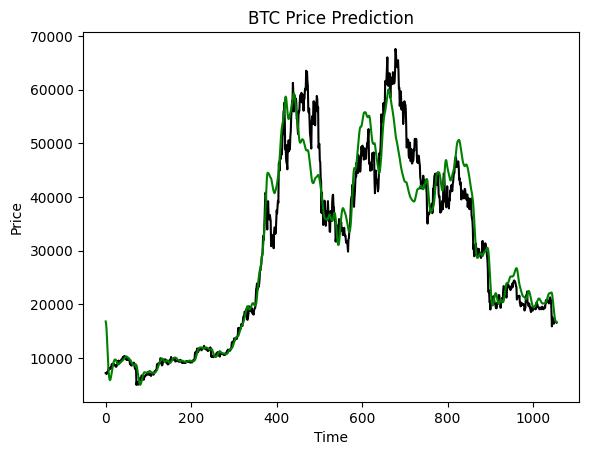

In [5]:

crypto_currency = "BTC"
against_currency = "USD"

#Start and end date for test data
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()


data = web.DataReader(f"{crypto_currency}-{against_currency}", "yahoo", start, end)


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

#sets the number of days to be predicted and test data
#looks at past [prediction_days] to predict
prediction_days = 60
future_day = 30


x_train, y_train = [], []


for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+future_day, 0])
    

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


model = Sequential()

#LSTM layers for feeding data to neural network. Dropout layers to prevent overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)



test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto_currency}-{against_currency}", "yahoo", test_start, test_end)
actual_prices = test_data["Close"].values

total_dataset = pd.concat((data["Close"], test_data["Close"]), axis=0)


model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Predicts the prices using the model
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

#Plots them on a graph
plt.plot(actual_prices, color="black", label="Actual Prices")
plt.plot(prediction_prices, color="green", label="Predicited Prices")
plt.title(f"{crypto_currency} Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

#Predict next day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
read_data = np.array(real_data)

In [6]:
real_data = np.asarray(real_data)

In [7]:
real_data = np.reshape(read_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 1s 793ms/step
[[16865.959]]


In [8]:
import pickle

In [10]:
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-20 22: